## Medical Cost Personal Insurance Project

##### Project Description

###### Columns

**Predict :** Can you accurately predict insurance costs?

**Dataset Link-**
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Dataset consists of 1338 records. Each record contains the below data for specific person.**

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
680,21,female,17.4,1,no,southwest,2585.269


###### Explanatory Analysis

In [7]:
#Checking the dimension of the dataset
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
#checking the types of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
#Groups columns by data type

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [11]:
# checking the null values

df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
# checking the null values count in each column

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#Checks for specified values in DataFrame

df.isin([' ','NA','_']).sum().any()

False

In [14]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

          Missing Values  % Missing data
age                    0             0.0
sex                    0             0.0
bmi                    0             0.0
children               0             0.0
smoker                 0             0.0
region                 0             0.0
charges                0             0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

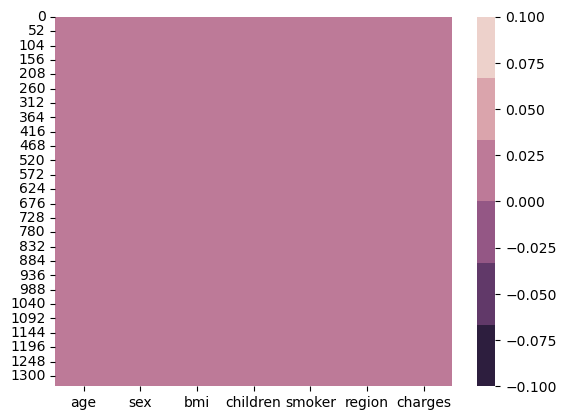

In [17]:
# Lets visualize it using heatmap

sns.heatmap(df.isnull(), cmap=sns.cubehelix_palette(reverse=True))

**Checking the value counts of each columns**

In [20]:
 #Age categories using pd.cut
df1=pd.DataFrame()
age_bins = [0, 9, 19, 29, 39, 49, 59, float('inf')]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['age_1'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# BMI categories using pd.cut
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['under-weight', 'normal-weight', 'over-weight', 'obese']
df['bmi_1'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Grouping and counting
age_count= df.groupby(by='age_1').size()
sex_count = df.groupby(by='sex').size()
smoker_count = df.groupby(by='smoker').size()
region_count = df.groupby(by='region').size()
children_count = df.groupby(by='children').size()
bmi_count = df.groupby(by='bmi_1').size()
charges_count = df.groupby(by='charges').size()

print(age_count,'\n')
print(sex_count,'\n' )
print(smoker_count,'\n')
print(region_count,'\n')
print(children_count,'\n')
print(bmi_count,'\n')
print(charges_count,'\n')

age_1
0-9        0
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64 

sex
female    662
male      676
dtype: int64 

smoker
no     1064
yes     274
dtype: int64 

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64 

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64 

bmi_1
under-weight      21
normal-weight    221
over-weight      380
obese            716
dtype: int64 

charges
1121.87390     1
1131.50660     1
1135.94070     1
1136.39940     1
1137.01100     1
              ..
55135.40209    1
58571.07448    1
60021.39897    1
62592.87309    1
63770.42801    1
Length: 1337, dtype: int64 



**Based on the provided data, the following observations can be made:**

In [21]:
df.dtypes.index

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'age_1',
       'bmi_1'],
      dtype='object')

###### Separating Numerical and Categorical column

In [23]:
#Checking for the categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns:", numerical_col)

Categorical Columns: ['sex', 'smoker', 'region']


Numerical Columns: ['age', 'bmi', 'children', 'charges', 'age_1', 'bmi_1']


In [24]:
#checking number of unique values in each column

df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337
age_1,6
bmi_1,4


###### Description of Dataset

In [25]:
# Stattistical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Data Visualisation  -----Graphical Analysis


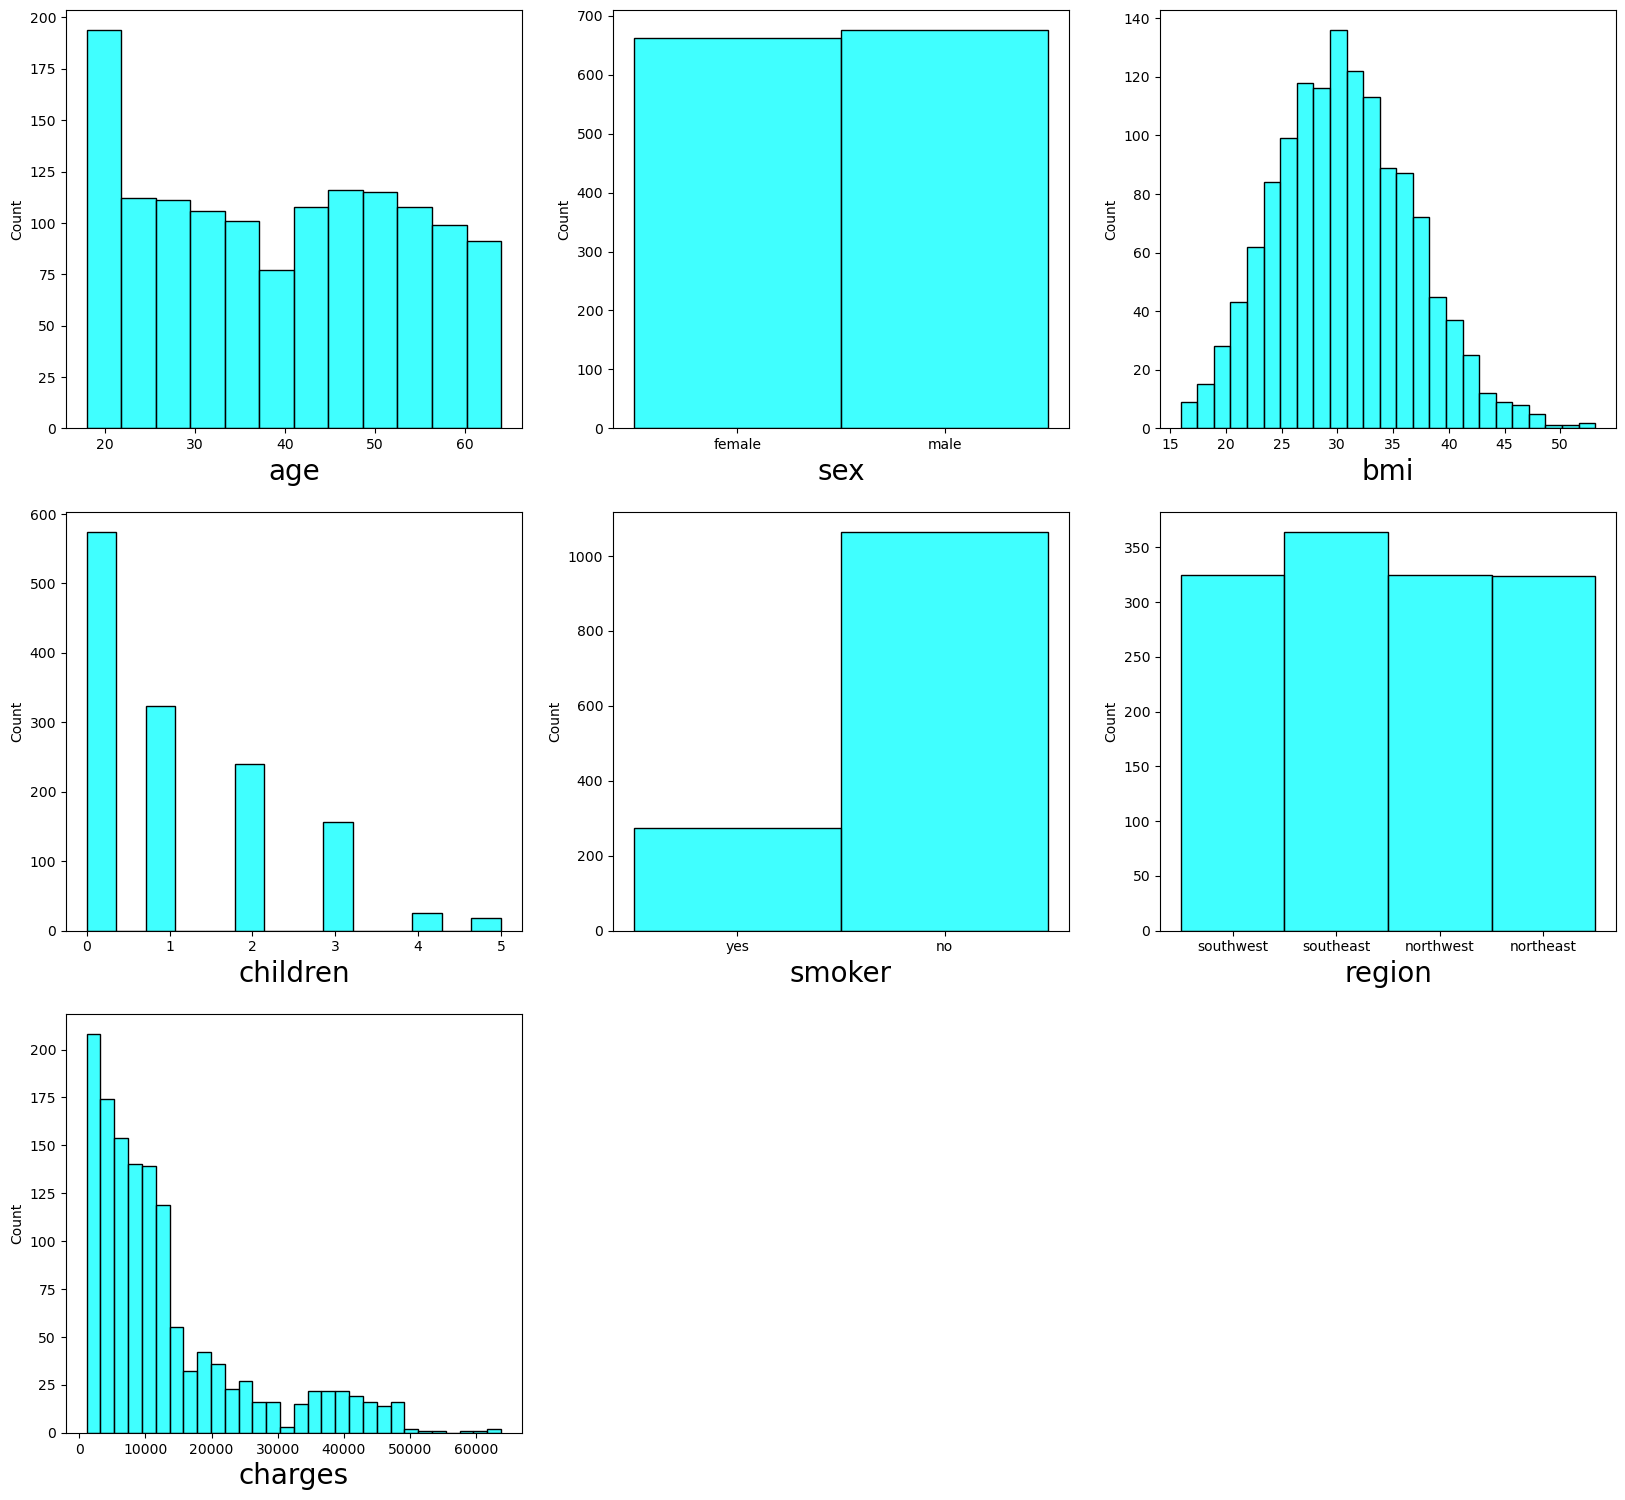

In [27]:
#univariant analysis
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=7:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(df[column], color='cyan')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

20-29    280
40-49    279
50-59    271
30-39    257
10-19    137
60-69    114
0-9        0
Name: age_1, dtype: int64


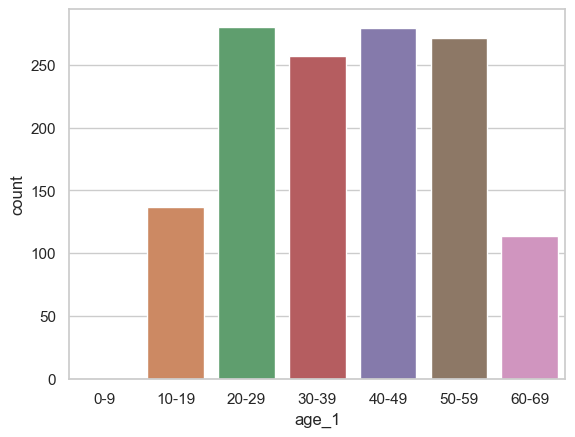

In [812]:
# Visualization the number of age_1

ax = sns.countplot (x='age_1', data=df)
print(df['age_1'].value_counts())

obese            716
over-weight      380
normal-weight    221
under-weight      21
Name: bmi_1, dtype: int64


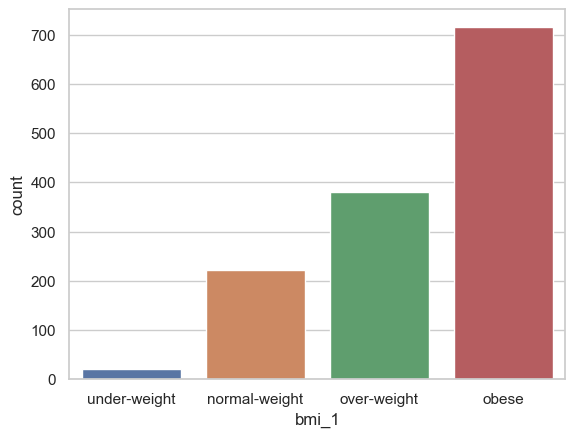

In [813]:
# Visualization the number of bmi_1
ax = sns.countplot (x='bmi_1', data=df)
print(df['bmi_1'].value_counts())

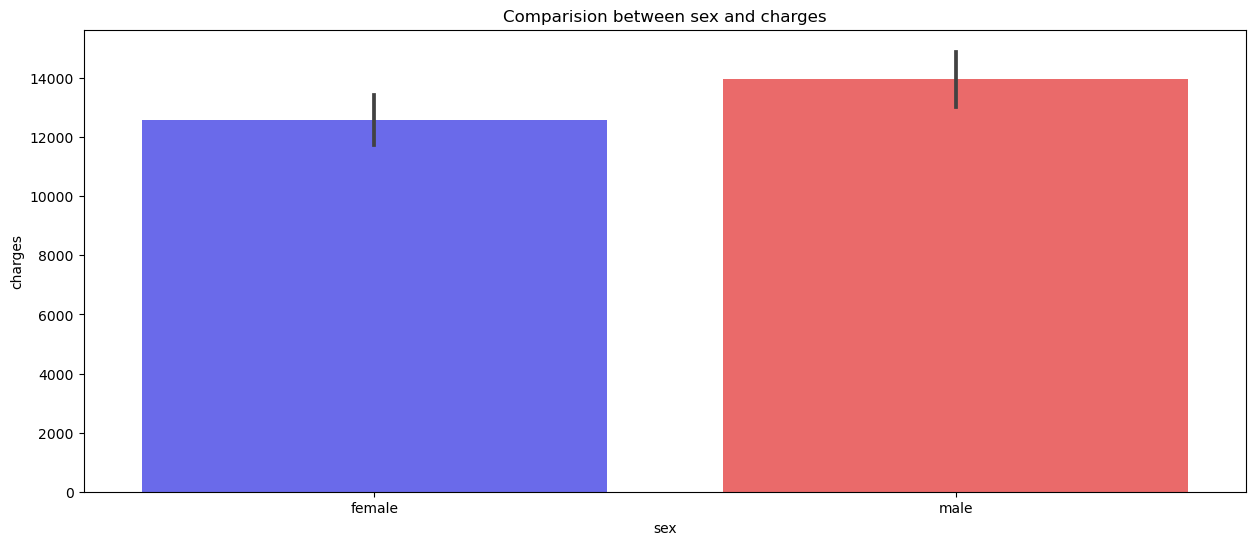

In [35]:
#Bivariant Analysis
# Comparing sex and charges

plot = plt.figure(figsize=(15,6))
plt.title("Comparision between sex and charges")
sns.barplot( data = df, x = "sex", y = "charges", palette = 'seismic')
plt.show()

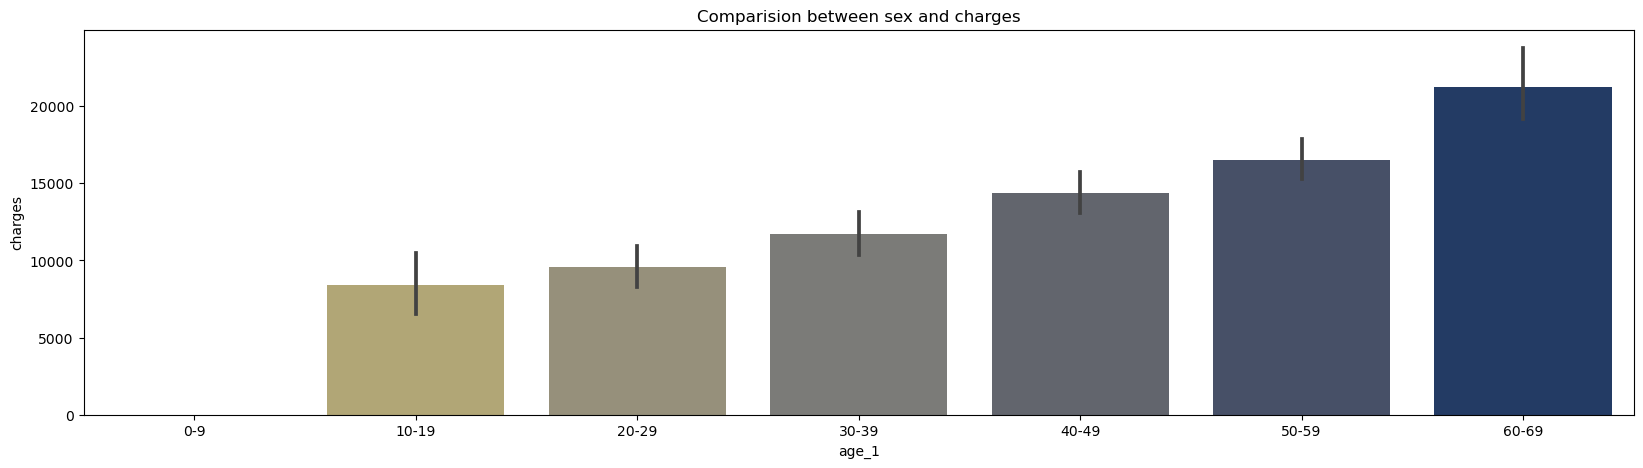

In [30]:
# Comparing age and charges
plot = plt.figure(figsize=(20,5))
plt.title("Comparision between sex and charges")
sns.barplot(x = "age_1", y = "charges", data = df, palette = 'cividis_r')
plt.show()

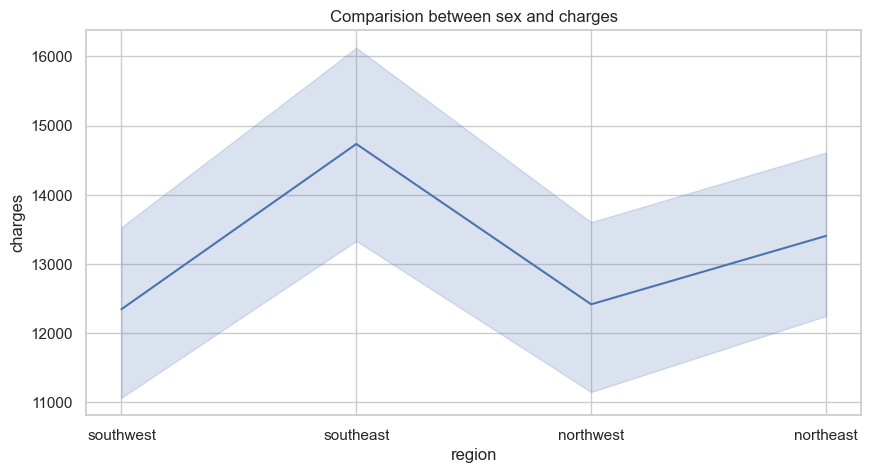

In [816]:
# Comparing sex and charges

plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.lineplot(data=df, x="region", y="charges", palette = 'afmhot')
plt.show()

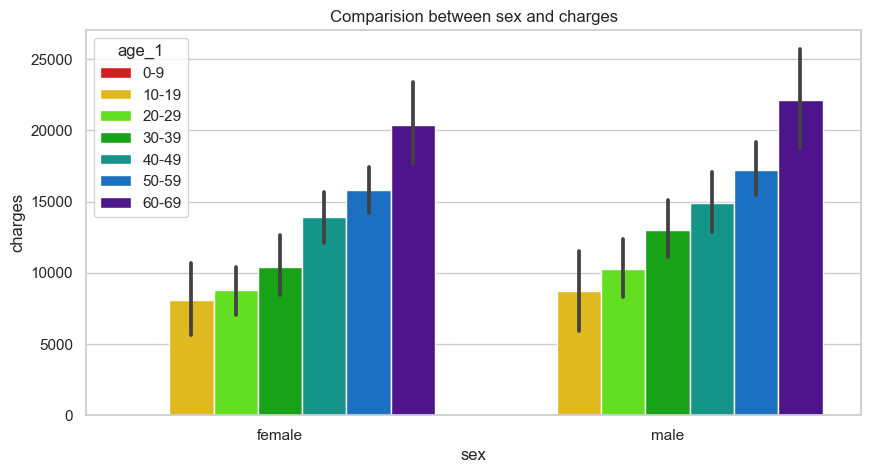

In [817]:
# Comparing sex and charges

plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.barplot(data=df, x="sex", y="charges", hue="age_1", palette = 'nipy_spectral_r')
plt.show()

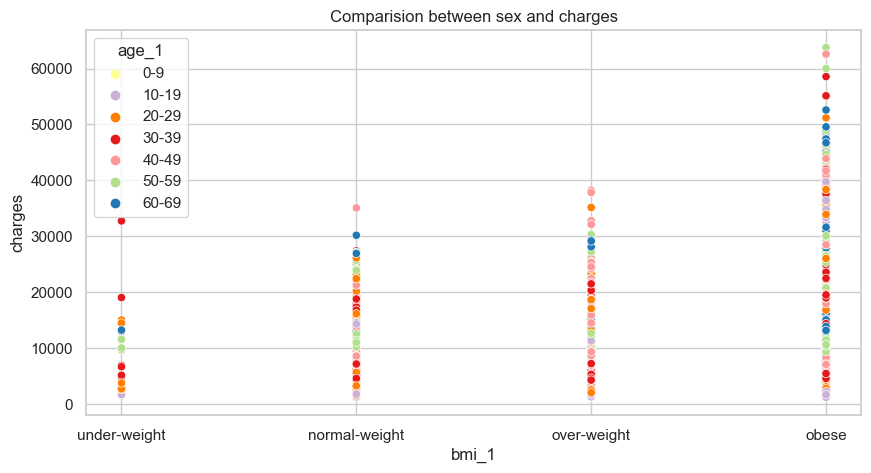

In [818]:
# Comparing bmi_1 and charges

plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.scatterplot(data=df, x="bmi_1", y="charges", hue="age_1", palette = 'Paired_r')
plt.show()

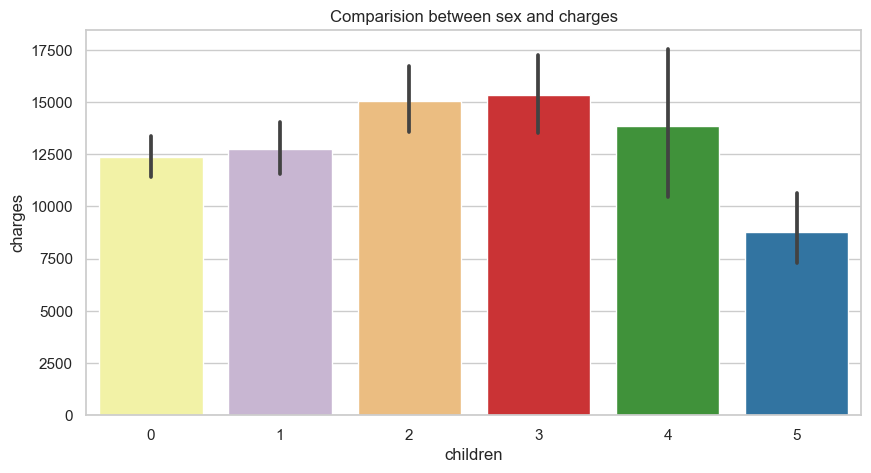

In [819]:
# Comparing children and charges

plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.barplot(data=df, x="children", y="charges", palette = 'Paired_r')
plt.show()

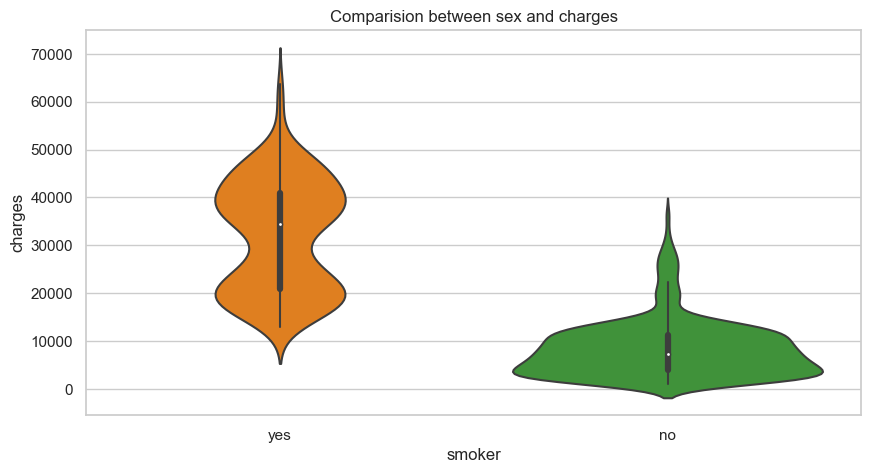

In [820]:
# Comparing children and charges

plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.violinplot(data=df, x="smoker", y="charges", palette = 'Paired_r')
plt.show()

In [55]:
df = df.drop("age_1", axis = 1)

In [56]:
df= df.drop("bmi_1", axis = 1)

### Checking for Outliers

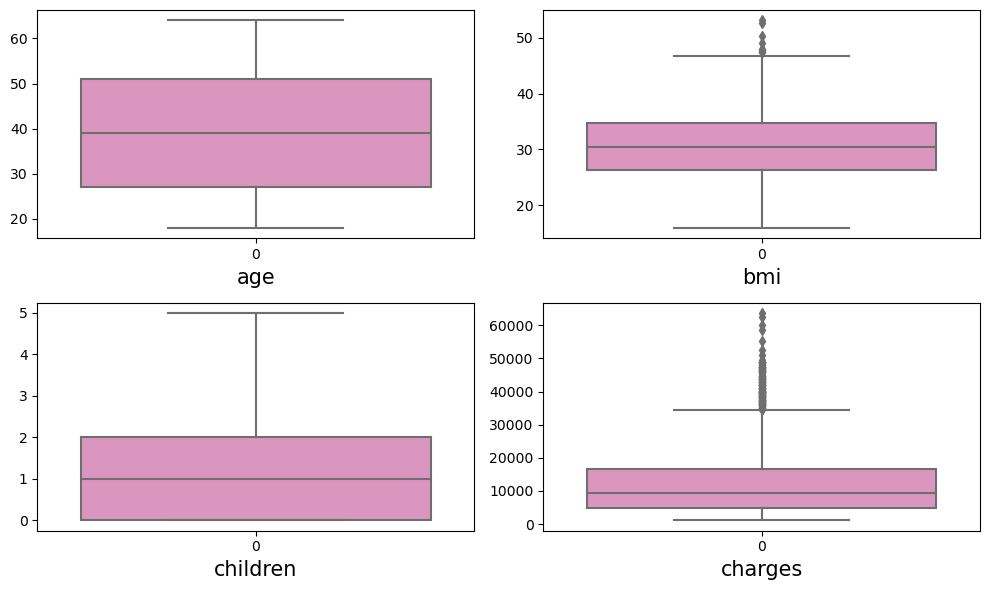

In [57]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [63]:
from scipy.stats import zscore

out_features = df[['bmi']]

z=np.abs(zscore(out_features))
z

,bmi
0,0.453320
1,0.509621
2,0.383307
3,1.305531
4,0.292556
...,...
1333,0.050297
1334,0.206139
1335,1.014878
1336,0.797813


In [64]:
#threshold = 3
np.where(z>3)
#Ist array keep the rows number and second array keeps the column

(array([ 116,  847, 1047, 1317], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [65]:

df1 =df[(z<3).all(axis=1)]

df1.shape

(1334, 7)

In [66]:
#Shape of old and new DataFrame
print('Old Data Frame- ',df.shape[0])
print('New Data Frame-',df1.shape[0])

Old Data Frame-  1338
New Data Frame- 1334


In [62]:
print('Data Loss Percentage- ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  0.29895366218236175


In [830]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [831]:
#Removing skewness using cuberoot method
df['charges'] = np.cbrt(df['charges'])

In [832]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     0.515183
dtype: float64

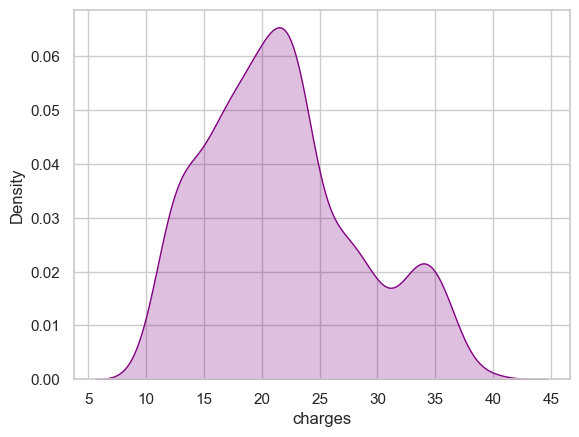

In [833]:
# Lets visualize how the data has distributed in TotalCharges after removing skewness
sns.distplot(df['charges'], color = "purple", kde_kws = {"shade":True}, hist = False)
plt.show()

**Assessing the correlation between non-categorical variables (age, BMI, and number of children) and charges, while considering smoking behavior.**

Determining charges by age, BMI, and number of children, categorized by smoking habits.

Text(0.5, 1.0, 'Scatterplot of children vs Charges by Smoking Status')

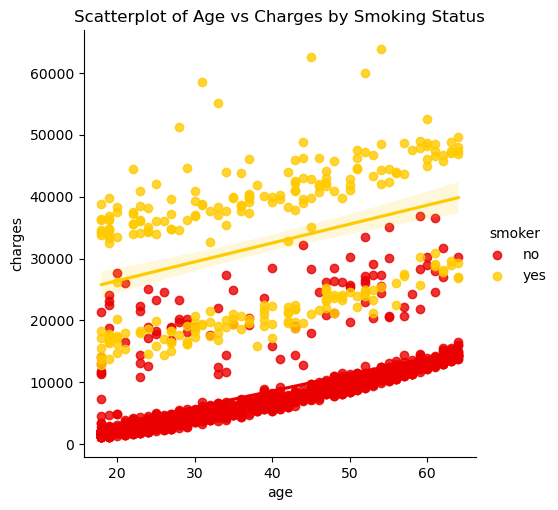

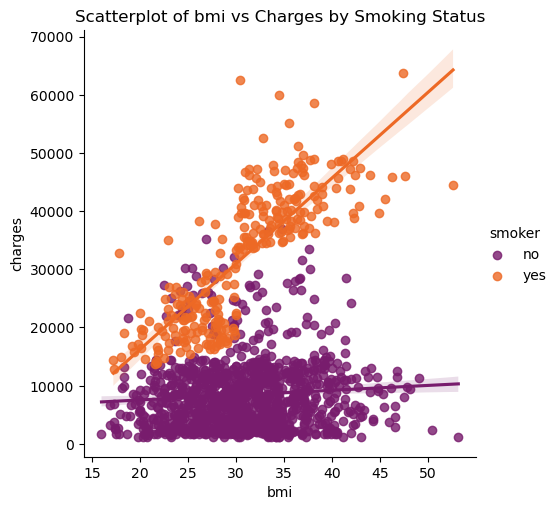

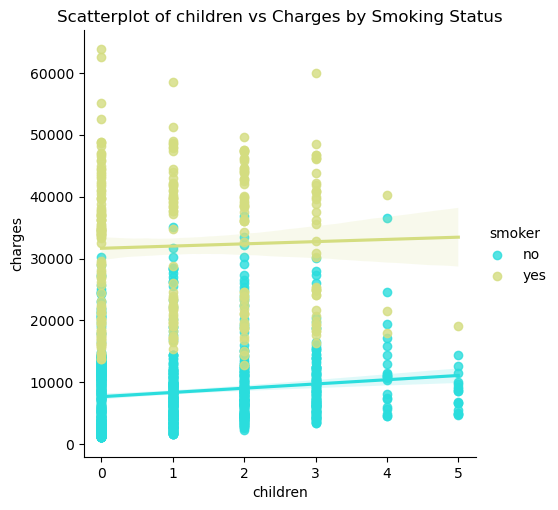

In [67]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'hot')
plt.title('Scatterplot of Age vs Charges by Smoking Status')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'inferno')
plt.title('Scatterplot of bmi vs Charges by Smoking Status')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'rainbow')
plt.title('Scatterplot of children vs Charges by Smoking Status')

In [68]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [69]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [70]:
#statistical summary of numerical
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


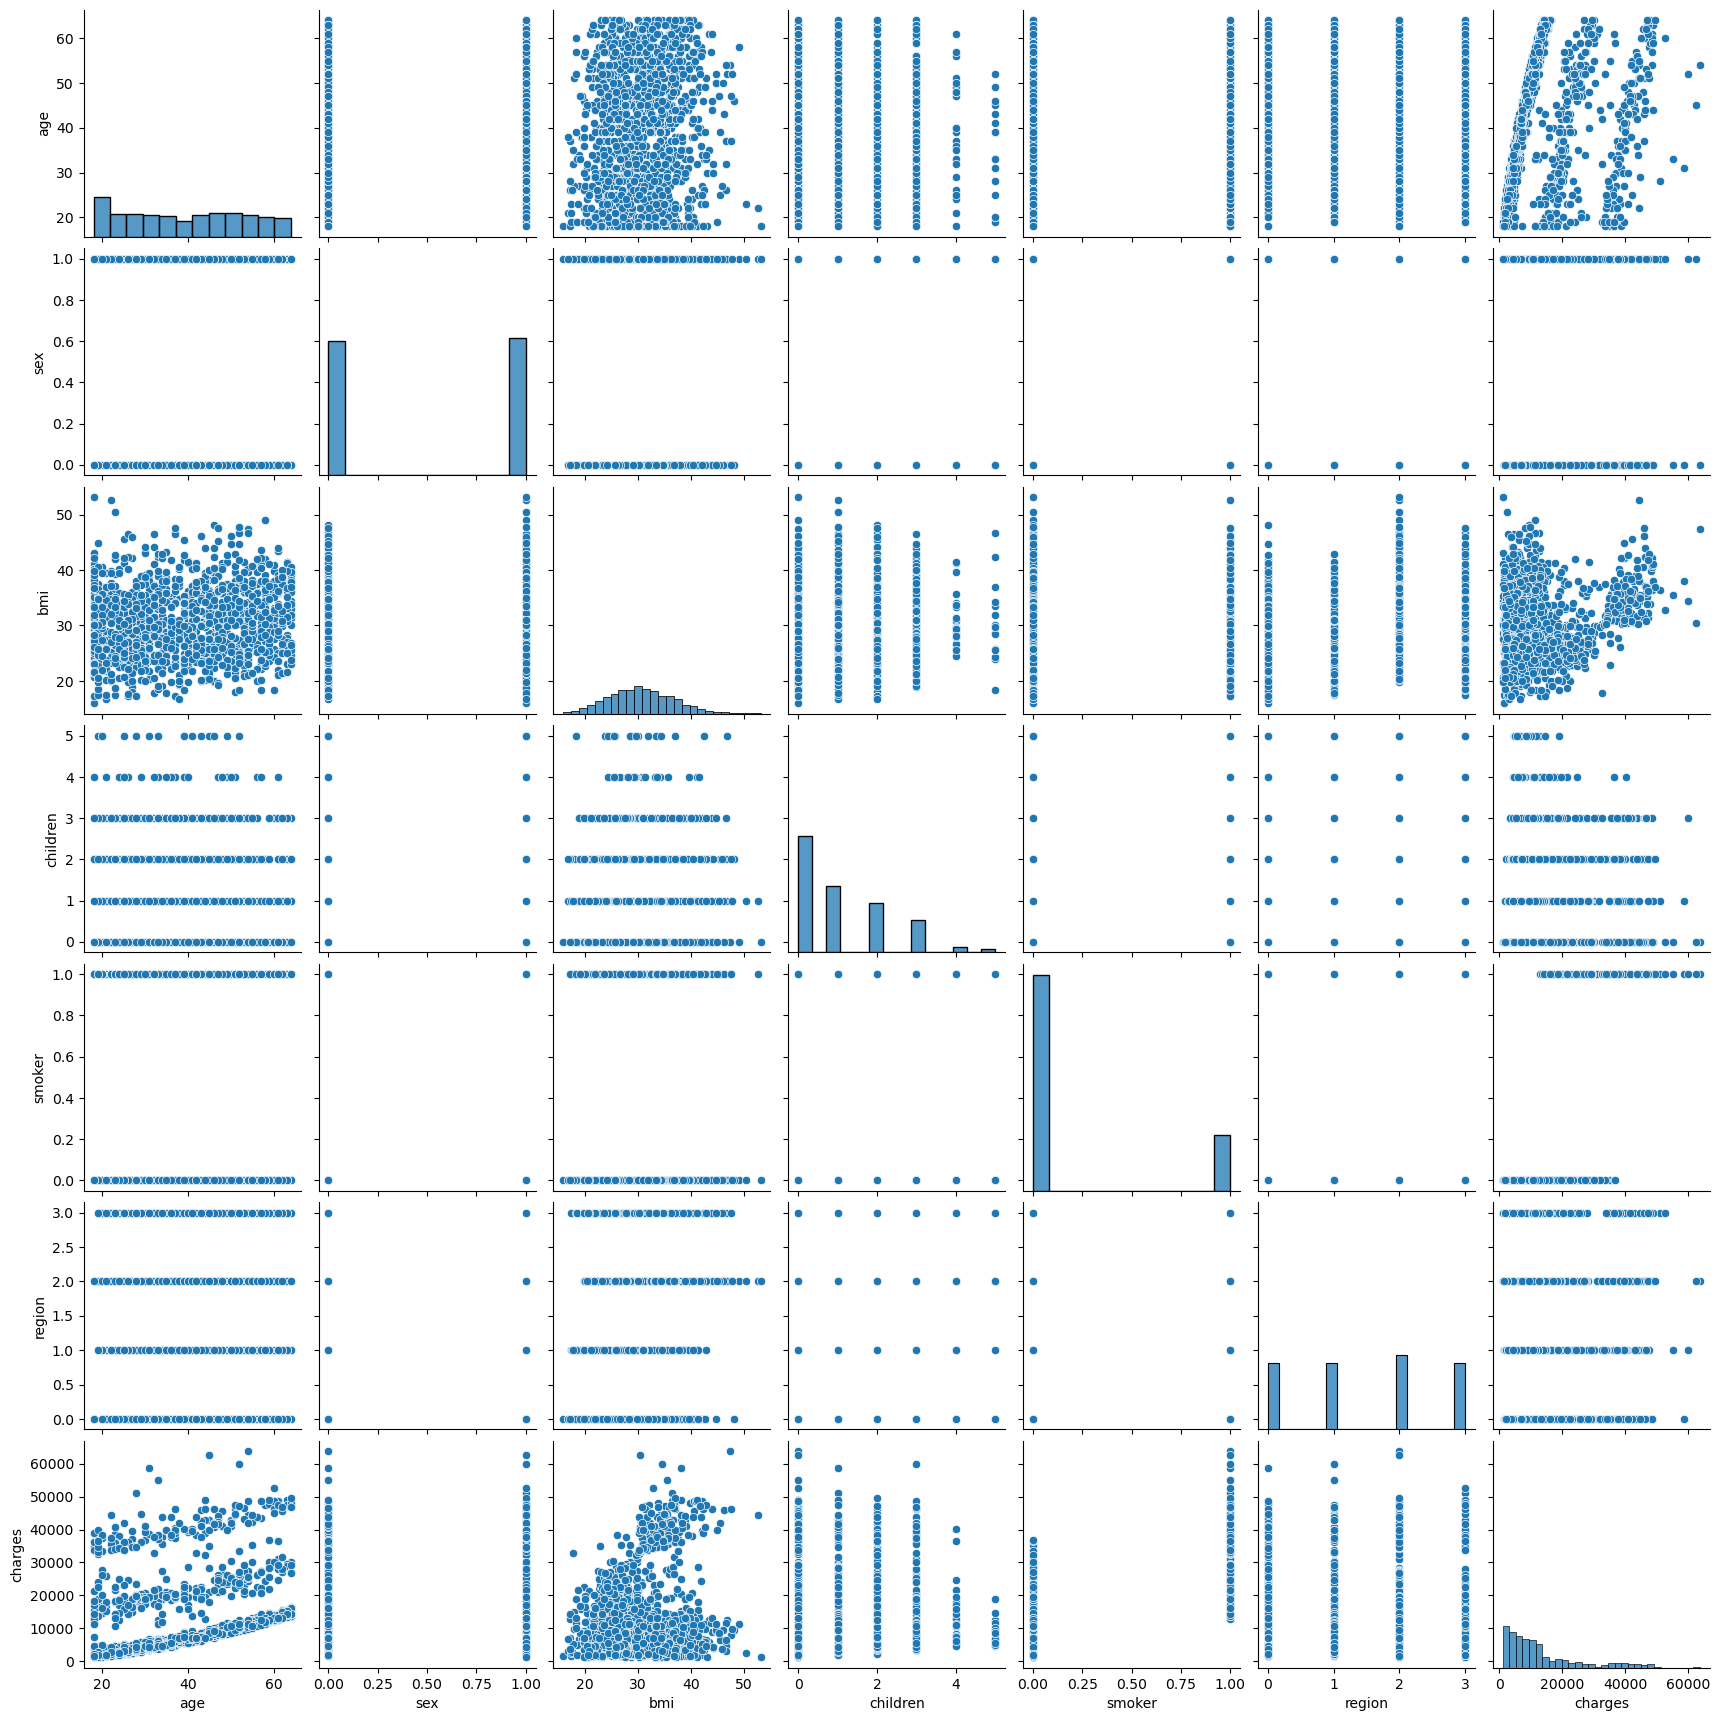

In [71]:
sns.pairplot(df)

###### Correlation between target variable and independent variables.

In [72]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


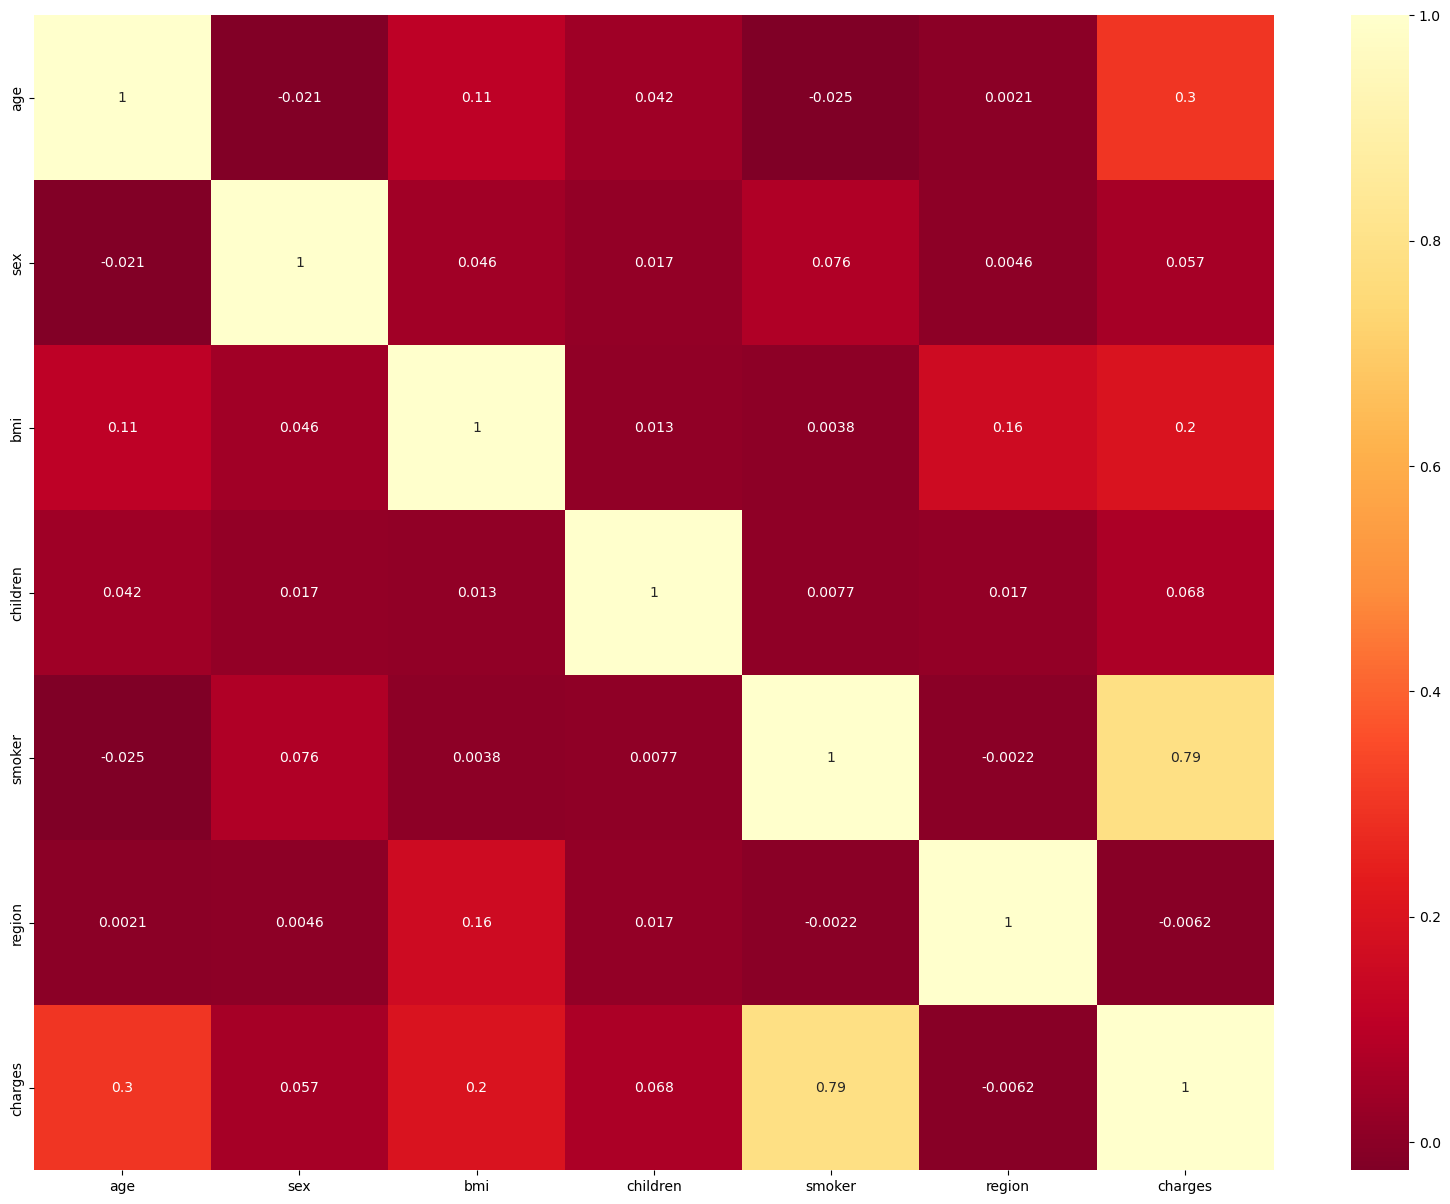

In [73]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(cor, cmap='YlOrRd_r',annot=True)

plt.show()

In [74]:
cor['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

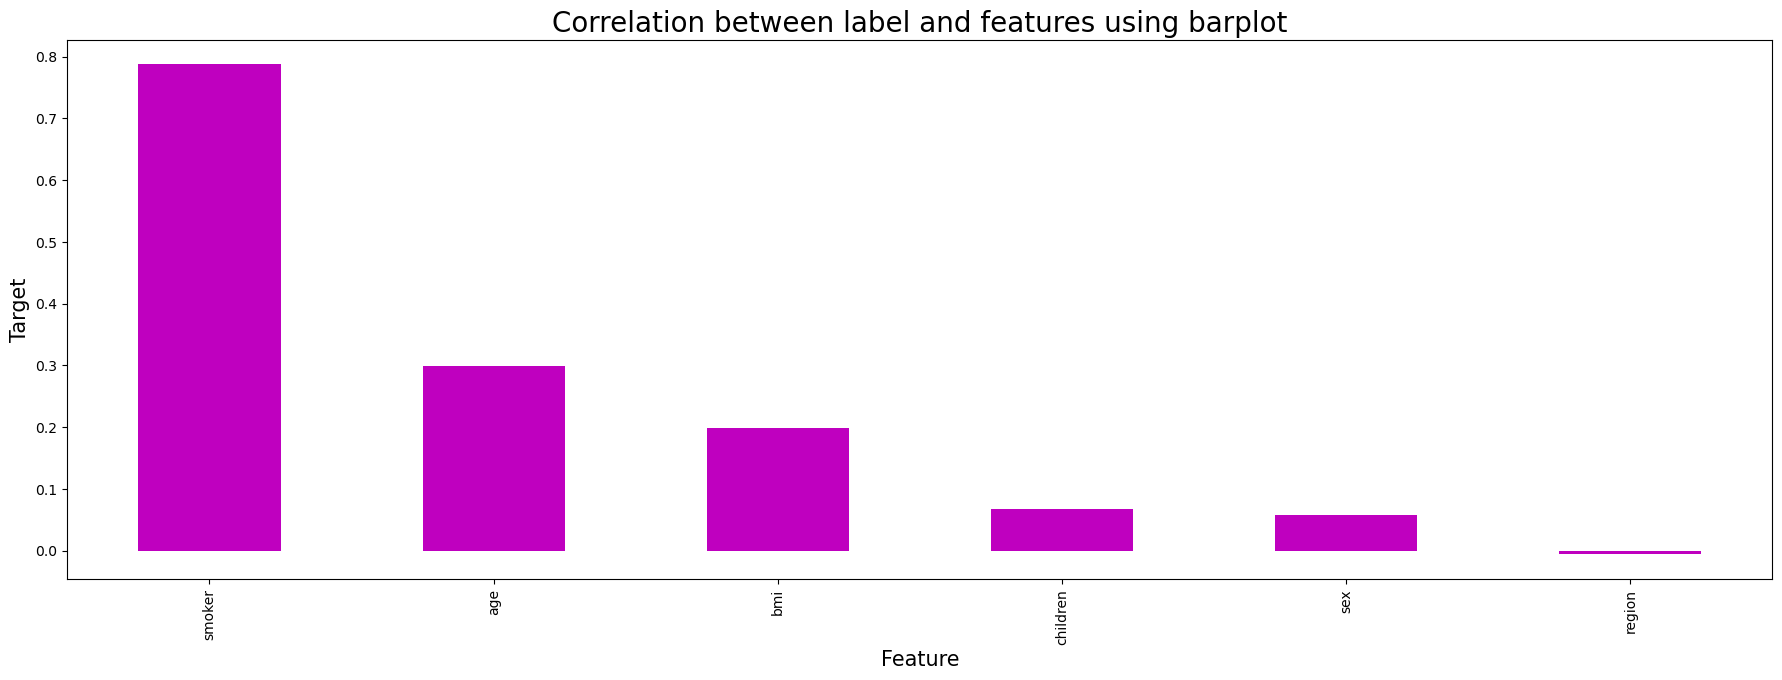

In [75]:
plt.figure(figsize = (22, 7))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

###### Data Preprocessing for Machine Learning

In [76]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [77]:
features = df.drop(['charges'], axis = 1)
targets = df['charges']

In [78]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

**Our aim: Predict insurance costs using regression. We'll employ Linear Regression, Random Forest Regressor, and Polynomial Regression algorithms.**

###### Linear Regression

In [79]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.983908824417
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [80]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.7998747145449959


###### Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100, criterion = "friedman_mse", random_state = 0, n_jobs = -1) 
RFR.fit(x_train, y_train)
x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3777544.250
Mean Squared Error test data: 20622326.337

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Accuracy Score: 87.0405761200044


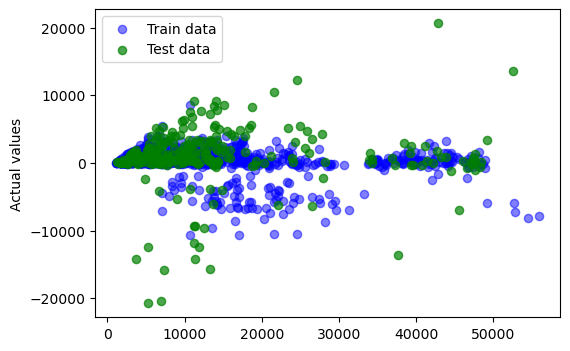

In [92]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'blue', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')


# plt.xlabel("Predicted values")
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')

### Feature Importance Ranking

1.smoker(0.606920)
2.bmi(0.215364)
3.age(0.136111)
4.children(0.021588)
5.region(0.014198)
6.sex(0.005819)


<BarContainer object of 6 artists>

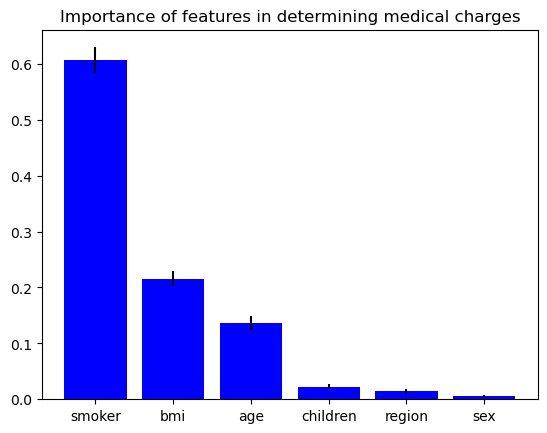

In [93]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

### Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [96]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.881705253554
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345231


### Best Algorithm:

In [97]:
#Independent variables
features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [98]:
#Dependent variable
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [99]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
